In [1]:
%pip install download

Note: you may need to restart the kernel to use updated packages.


In [2]:
from __future__ import  absolute_import, division, print_function, unicode_literals
# import seaborn as sns
import matplotlib as mpl
# import matplotlib.pyplot as plt
import os
# import numpy as np
import pandas as pd
from datetime import datetime
from download import download
import plotly.express as px
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False   

# downloading the data

In [3]:
# download the data to the current directory with absolute path
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip',os.getcwd() + '\data', kind='zip')

Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


# loading the data

In [4]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [6]:
df = pd.read_csv(
    path + "\PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv",
    parse_dates=[["year", "month", "day", "hour"]],
    date_parser=convert_to_date,
    keep_date_col=True,
)
df.set_index("year_month_day_hour", inplace=True)
df

C:\Users\triro\AppData\Local\Temp\ipykernel_944136\3727960765.py:1: FutureWarning: The 'keep_date_col' keyword in pd.read_csv is deprecated and will be removed in a future version. Explicitly remove unwanted columns after parsing instead.
  df = pd.read_csv(
C:\Users\triro\AppData\Local\Temp\ipykernel_944136\3727960765.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
C:\Users\triro\AppData\Local\Temp\ipykernel_944136\3727960765.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  object 
 2   month    35064 non-null  object 
 3   day      35064 non-null  object 
 4   hour     35064 non-null  object 
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(1), object(6)
memory usage: 6.1+ MB


In [22]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f'Features: {df.columns.tolist()}')
print(f'Missing values:\n{df.isnull().any()}')
print(f'Dublicate rows: {df.duplicated().sum()}')
print(f'Number of unique values:\n{df.nunique()}')

Rows: 35064
Columns: 18
Features: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
Missing values:
No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool
Dublicate rows: 0
Number of unique values:
No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64


In [23]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [26]:
df.query('TEMP != TEMP')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-01-27 20:00:00,16749,2015,1,27,20,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-30 13:00:00,16814,2015,1,30,13,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-01-31 05:00:00,16830,2015,1,31,5,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 11:00:00,16884,2015,2,2,11,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 10:00:00,16931,2015,2,4,10,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-04 13:00:00,16934,2015,2,4,13,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-07 15:00:00,17008,2015,2,7,15,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-08 14:00:00,17031,2015,2,8,14,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [27]:
df.query('TEMP != TEMP').count()

No         53
year       53
month      53
day        53
hour       53
PM2.5      53
PM10       53
SO2        53
NO2        53
CO         53
O3         53
TEMP        0
PRES        3
DEWP        0
RAIN        3
wd         10
WSPM       10
station    53
dtype: int64

In [28]:
df[df['PM2.5'].isnull()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-04-01 08:00:00,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
2013-04-01 09:00:00,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
2013-04-01 10:00:00,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
2013-04-01 11:00:00,756,2013,4,1,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
2013-04-01 12:00:00,757,2013,4,1,12,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-20 15:00:00,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
2017-02-20 16:00:00,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
2017-02-20 18:00:00,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling


In [29]:
fig = px.line(df, y="PM2.5", title="PM2.5 over time")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        )
    ),
)
fig.show()

In [30]:
fig = px.line(df, y="TEMP", title="TEMP over time")
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(count=3, label="3y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        )
    ),
)
fig.show()

In [31]:
df.loc['2015-02-02':'2015-02-04']   

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-02 00:00:00,16873,2015,2,2,0,67.0,67.0,32.0,40.0,2600.0,11.0,-4.0,1025.0,-19.5,0.0,NW,1.3,Dingling
2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 02:00:00,16875,2015,2,2,2,65.0,65.0,17.0,46.0,2600.0,3.0,-6.0,1023.0,-19.7,0.0,NNW,0.1,Dingling
2015-02-02 03:00:00,16876,2015,2,2,3,75.0,75.0,18.0,50.0,2900.0,3.0,-6.0,1023.0,-19.4,0.0,NNW,2.3,Dingling
2015-02-02 04:00:00,16877,2015,2,2,4,96.0,96.0,19.0,53.0,3600.0,2.0,-6.0,1023.0,-19.0,0.0,NW,1.5,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-02-04 19:00:00,16940,2015,2,4,19,4.0,20.0,2.0,2.0,200.0,88.0,3.0,1023.0,-15.2,0.0,NNW,4.0,Dingling
2015-02-04 20:00:00,16941,2015,2,4,20,5.0,12.0,3.0,2.0,200.0,87.0,2.0,1026.0,-15.5,0.0,NNW,3.5,Dingling
2015-02-04 21:00:00,16942,2015,2,4,21,5.0,7.0,3.0,2.0,200.0,84.0,2.0,1022.0,-14.6,0.0,N,3.1,Dingling


In [32]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 05:00:00,6,2013,3,1,5,6.0,6.0,3.0,4.0,200.0,79.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Dingling
2013-03-01 06:00:00,7,2013,3,1,6,5.0,10.0,3.0,4.0,200.0,77.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Dingling
2013-03-01 07:00:00,8,2013,3,1,7,5.0,6.0,3.0,2.0,200.0,80.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Dingling
2013-03-01 08:00:00,9,2013,3,1,8,8.0,7.0,3.0,3.0,200.0,79.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

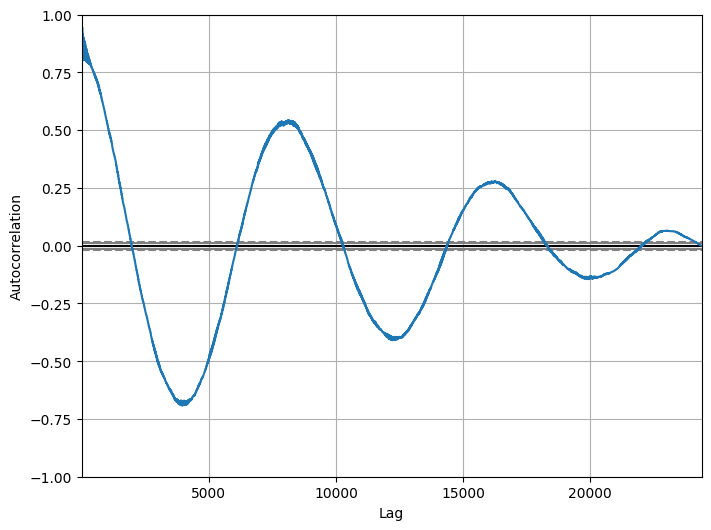

In [33]:
pd.plotting.autocorrelation_plot(df_copy.loc['2014':'2016'][['TEMP']])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

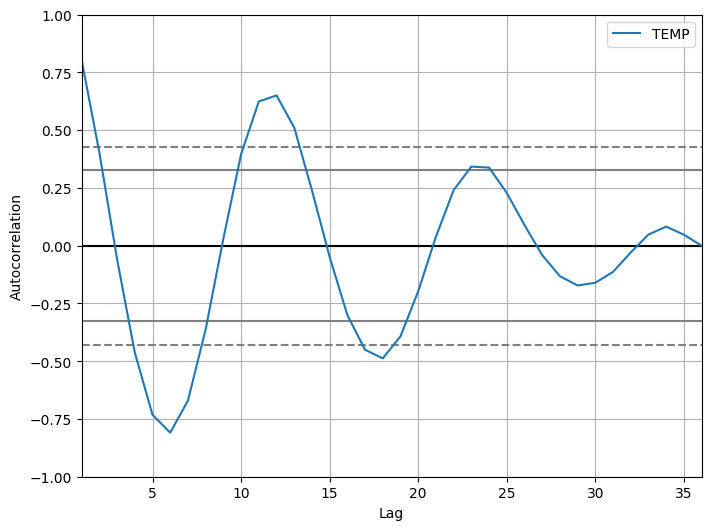

In [34]:
pd.plotting.autocorrelation_plot(df_copy.loc['2014':'2016'][['TEMP']].resample('ME').mean(), label='TEMP')

# high auto regressive correlation between TEMP(t=0), TEMP(t=1), TEMP(t=3), TEMP(t=24) and even TEMP(t=8640)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

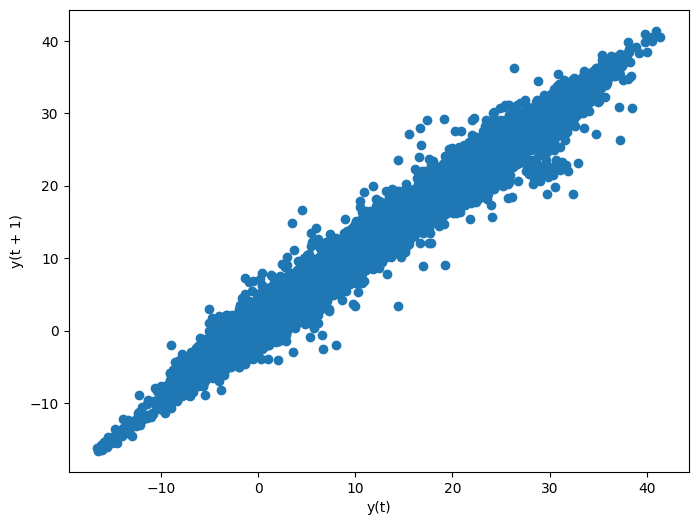

In [35]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=1) # default lag is 1 

<Axes: xlabel='y(t)', ylabel='y(t + 10)'>

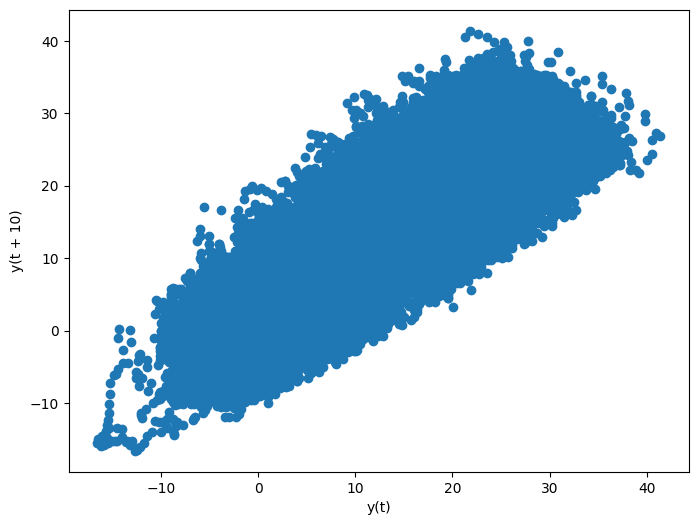

In [36]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=10)

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

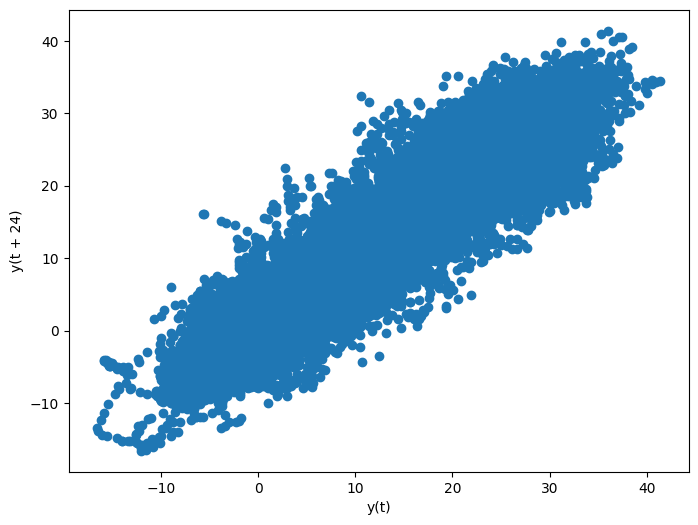

In [37]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=24)

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

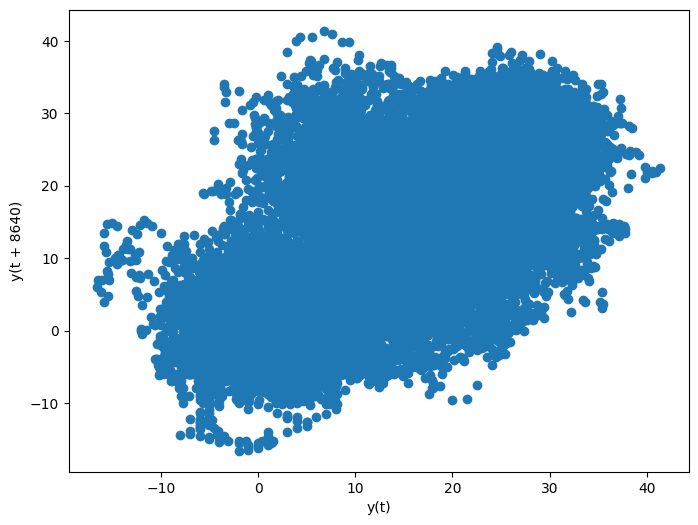

In [38]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=8640) # 24*360 = 8640 almost 1 year

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

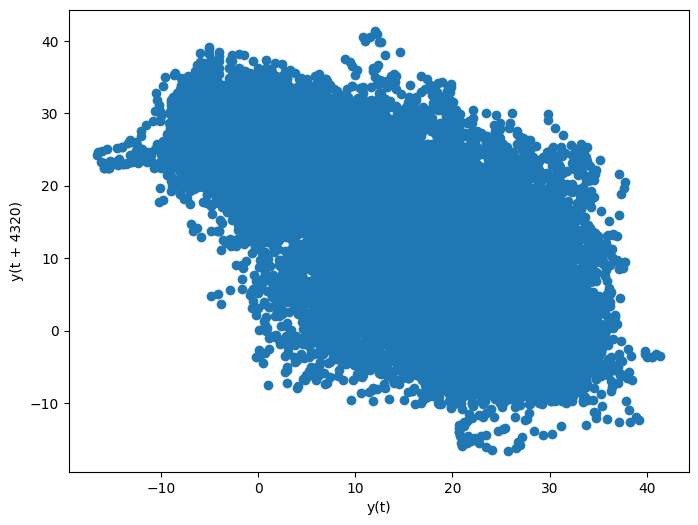

In [39]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=4320) # 24*(360/2) = 4320 almost 6 months

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

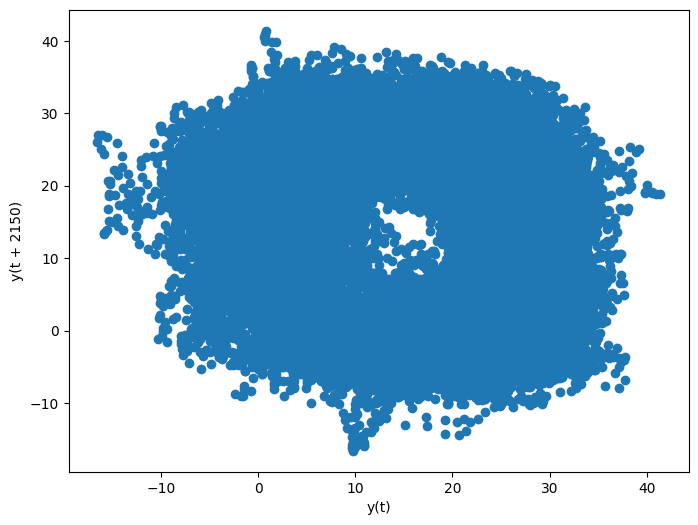

In [40]:
pd.plotting.lag_plot(df_copy['TEMP'], lag=2150) # almost 3 months

# which means we can impute the null values with the past 1 value from one hour ago for example

In [52]:
df_copy2 = df.copy()
df_copy2.loc['2015-02-21 10':'2015-02-21 20']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,2015,2,21,10,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,2015,2,21,11,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,2015,2,21,12,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,2015,2,21,13,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,2015,2,21,14,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,2015,2,21,15,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,2015,2,21,16,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,2015,2,21,17,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,2015,2,21,18,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


# ffill(forward fill): takes the previous value and imputes the null value with it

In [53]:
df_copy2["TEMP_FFILL"] = df_copy2["TEMP"].fillna(method="ffill")

C:\Users\triro\AppData\Local\Temp\ipykernel_944136\707033914.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [54]:
df_copy2.loc['2015-02-21 10':'2015-02-21 20'][["TEMP", "TEMP_FFILL"]]

,TEMP,TEMP_FFILL
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


# bfill(backward fill): takes the next value and imputes the null value with it

In [55]:
df_copy2 = df.copy()

In [56]:
df_copy2["TEMP_BFILL"] = df_copy2["TEMP"].fillna(method="bfill")
df_copy2.loc['2015-02-21 10':'2015-02-21 20'][["TEMP", "TEMP_BFILL"]]

C:\Users\triro\AppData\Local\Temp\ipykernel_944136\1352419381.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,TEMP,TEMP_BFILL
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,2.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,4.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [57]:
df_copy2["TEMP"].rolling(window=2, min_periods=1).mean()

year_month_day_hour
2013-03-01 00:00:00    -2.30
2013-03-01 01:00:00    -2.40
2013-03-01 02:00:00    -2.75
2013-03-01 03:00:00    -3.30
2013-03-01 04:00:00    -3.55
                       ...  
2017-02-28 19:00:00    12.55
2017-02-28 20:00:00    11.30
2017-02-28 21:00:00    10.20
2017-02-28 22:00:00     8.65
2017-02-28 23:00:00     7.40
Name: TEMP, Length: 35064, dtype: float64

In [58]:
df_copy2["TEMP_ROLLING"] = df_copy2["TEMP"].rolling(window=2, min_periods=1).mean()
df_copy2

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,TEMP_BFILL,TEMP_ROLLING
year_month_day_hour,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,-2.3,-2.30
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,-2.5,-2.40
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,-3.0,-2.75
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,-3.6,-3.30
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,-3.5,-3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,11.7,12.55
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,10.9,11.30
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,9.5,10.20


In [100]:
df_copy3 = df.copy()
df_copy3

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling


In [101]:
print(df_copy3.loc[df_copy3.loc["2014-03-01":].index + pd.DateOffset(years=-1)]["TEMP"])
print(df_copy3.shift(24*365)["TEMP"].loc["2014-03-01":])

year_month_day_hour
2013-03-01 00:00:00   -2.3
2013-03-01 01:00:00   -2.5
2013-03-01 02:00:00   -3.0
2013-03-01 03:00:00   -3.6
2013-03-01 04:00:00   -3.5
                      ... 
2016-02-28 19:00:00   -0.7
2016-02-28 20:00:00   -1.2
2016-02-28 21:00:00   -1.6
2016-02-28 22:00:00   -2.1
2016-02-28 23:00:00   -2.4
Name: TEMP, Length: 26304, dtype: float64
year_month_day_hour
2014-03-01 00:00:00   -2.3
2014-03-01 01:00:00   -2.5
2014-03-01 02:00:00   -3.0
2014-03-01 03:00:00   -3.6
2014-03-01 04:00:00   -3.5
                      ... 
2017-02-28 19:00:00    2.2
2017-02-28 20:00:00    1.9
2017-02-28 21:00:00    1.1
2017-02-28 22:00:00   -0.3
2017-02-28 23:00:00   -0.9
Name: TEMP, Length: 26304, dtype: float64


In [102]:
df_copy3.index = pd.to_datetime(df_copy3.index)
# with the DateOffset function
df_copy3["TEMP_PREV_Y"] = df_copy3.apply(lambda x: df_copy3.loc[x.name + pd.DateOffset(years=-1)]["TEMP"] if pd.isna(x["TEMP"]) else x["TEMP"], axis=1)
# with the shift function
# df_copy3["TEMP_PREV_Y"] = df_copy3.apply(lambda x: df_copy3.shift(24*365).loc[x.name]["TEMP"] if pd.isna(x["TEMP"]) else x["TEMP"], axis=1)
print(df_copy3['TEMP_PREV_Y'].isnull().sum())
df_copy3

0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,TEMP_PREV_Y
year_month_day_hour,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,-2.3
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,-2.5
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,-3.0
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,-3.6
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,-3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,11.7
2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,10.9
2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,9.5
